# Hotel Data Analytics Project

# Data exploration

### Exploring the fact_bookings sheet

In [3]:
import pandas as pd

In [4]:
df_booking=pd.read_csv('D:/Codebasics/Hproj/fact_bookings.csv')

In [3]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
# First we need to identify the number of rows and columns:

df_booking.shape # This returns a tuple with (rows, columns)

(134590, 12)

In [5]:
# To count the number of unique entries in a category we can use the unique() function.

#### unique()-determining the number of unique values in a column

In [6]:
df_booking['room_category'].unique() #This gives the number of unique entries in the room category column

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_booking['booking_platform'].unique() #No of unique booking platforms we have

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

#### count_values()-counting the number of values of each type in a given column

In [8]:
df_booking['booking_platform'].value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

#### plot()-plotting the data

<AxesSubplot:>

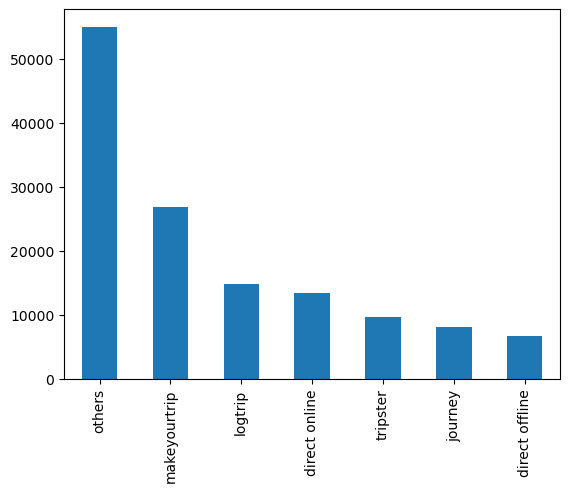

In [9]:
df_booking['booking_platform'].value_counts().plot(kind='bar') #Plots the platform wise booking status

<AxesSubplot:>

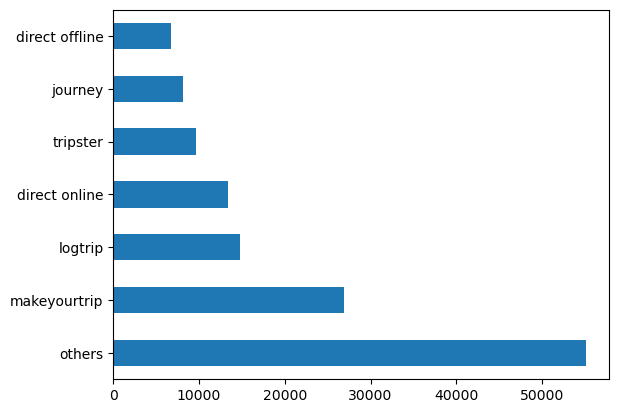

In [10]:
df_booking['booking_platform'].value_counts().plot(kind='barh') #Drawing a horizontal bar chart

#### describe()-Used to summarize statistics related to the numerical data in the table

In [11]:
df_booking.describe() 

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [12]:
# We could also look at a particular column for min, max values

In [13]:
df_booking['revenue_realized'].min(),df_booking['revenue_realized'].max()

(2600, 45220)

In [14]:
# Now reading all the other files

In [15]:
df_date=pd.read_csv('D:/Codebasics/Hproj/dim_date.csv')
df_hotels=pd.read_csv('D:/Codebasics/Hproj/dim_hotels.csv')
df_rooms=pd.read_csv('D:/Codebasics/Hproj/dim_rooms.csv')
df_agg_bookings=pd.read_csv('D:/Codebasics/Hproj/fact_aggregated_bookings.csv')

In [16]:
# Going through the tables

In [17]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [18]:
df_hotels['category'].value_counts() # There are 16 luxury and 9 Business hotels

Luxury      16
Business     9
Name: category, dtype: int64

In [19]:
df_hotels['city'].value_counts() # Counting the number of hotels in each city

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

In [20]:
df_hotels['city'].value_counts().sort_values() #Sorting the data number wise

Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: city, dtype: int64

<AxesSubplot:>

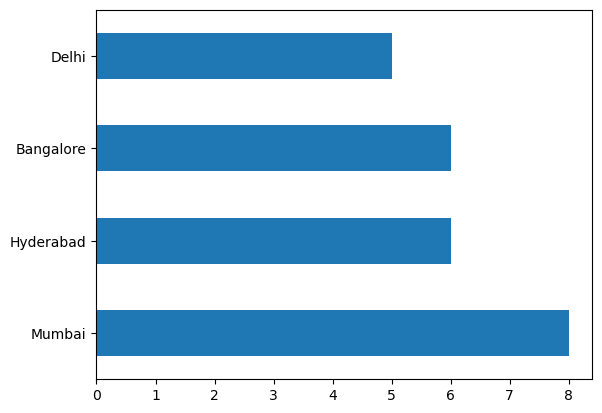

In [21]:
df_hotels['city'].value_counts().plot(kind='barh')

## Exploring the fact_aggregated_bookings sheet

### **1. Find out unique property ids in aggregate bookings dataset**

For this we simply use the unique() function

In [22]:
df_agg_bookings=pd.read_csv('D:/Codebasics/Hproj/fact_aggregated_bookings.csv')

In [23]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [24]:
df_agg_bookings['property_id'].unique() #Output displays the unique property IDs

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

####  **There are 25 different property IDs in the aggregate bookings dataset**

### **2. Find out total bookings per property_id**

1.) For this we first create groups based on property Id using the group by function 

2.) Then we use the sum function while refering to the capacity column of each group to calculate the total bookings per property Id.

In [25]:
df_agg_bookings.groupby('property_id')['capacity'].sum()

property_id
16558     4784.0
16559    11132.0
16560     8740.0
16561     6716.0
16562     9016.0
16563    10764.0
17558     9384.0
17559     9292.0
17560    11316.0
17561     7794.0
17562     7616.0
17563     9568.0
17564     8924.0
18558     8372.0
18559    11776.0
18560    10028.0
18561     9844.0
18562    11132.0
18563     8924.0
19558     9844.0
19559     8740.0
19560     9108.0
19561    10764.0
19562     8832.0
19563    10120.0
Name: capacity, dtype: float64

### **3. Find out days on which bookings are greater than capacity**

***Method 1: Defining a function and using the lambda x function***

Here we first segregate the data in two groups:

    1.) First where capacity exceeds limit
    2.) Second where capacity is in limit

This is done using the lambda and groupby function

Then we use the get_group() function to extract the group where teh capacity exceeds the limit

In [26]:
def capacity(df,x,col1,col2):
    if df[col1].loc[x]<=df[col2].loc[x]:
        return 'In capacity'
    else:
        return 'Capacity Exceeded'
pass

In [27]:
df=df_agg_bookings.groupby(lambda x: capacity(df_agg_bookings,x,'successful_bookings','capacity'))

In [28]:
df.get_group('Capacity Exceeded')

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
8,17561,1-May-22,RT1,22,NaN
12,16563,1-May-22,RT1,100,41.0
14,17562,1-May-22,RT1,12,NaN
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


***Method 2 : Using the for,if and drop functions:***

Here we run a for loop going through each row and checking if the occupancy exceeds the capacity or not.

if it doesnot then we drop that row, the remaining rows are displayed as result

In [29]:
df_test=pd.read_csv('D:/Codebasics/Hproj/fact_aggregated_bookings.csv')
for x in df_test.index:
    if df_test['successful_bookings'].loc[x]<=df_test['capacity'].loc[x]:
        df_test.drop(x,inplace=True)

In [30]:
df_test

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
8,17561,1-May-22,RT1,22,NaN
12,16563,1-May-22,RT1,100,41.0
14,17562,1-May-22,RT1,12,NaN
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


#### **Therefore the capacity is exceeded on 1st May,11th June,2nd July, 25th July and 31st July**

***Method 3 : Using indexing:***

Just using a simple condition in indexing and displaying the values that fulfill the criterion

In [31]:
df_test[df_test['successful_bookings']>df_test['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


##### The last method consumes the least lines of code, but doesnot include the rows where capacity has been put as NaN. This issue needs to be cleared using data cleaning

### **4. Find out properties that have highest capacity**

First we need to identify what is the highest capacity.

This is done using the max() function

Then we identify the unique propertyid where the capacity is max using indexing and max() function

In [32]:
df_agg_bookings['capacity'].max()

50.0

In [33]:
df1=df_agg_bookings[df_agg_bookings['capacity']==50]
df1

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [34]:
df1['property_id'].unique()

array([17558], dtype=int64)

#### **Therefore the property ID: 17558 has the max capacity of 50**

# Data Cleaning

## Cleaning the fact_bookings sheet

##### The fact_bookings column has some negtaive or zero entries in the no__guests column which is not possible. Therefore we need to identify and clean those values

In [5]:
# First we need to identify the rows with negative number of guests
df_booking[df_booking['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [6]:
#Therefore we need only positive values of no_guests.

df_booking=df_booking[df_booking['no_guests']>0]

#### Now we need to edit teh revenue_generated column to remove any outliers

In [7]:
df_booking['revenue_generated'].min(),df_booking['revenue_generated'].max()
#Here the max value seems too much for one booking

(6500, 28560000)

In [8]:
# To avoid such values we will use the 3-standard deviation method i.e. any
# value beyond 3-standard deviation is filtered out

In [9]:
# Implementing the 3-standard deviation method:
df_booking['revenue_generated'].mean(),df_booking['revenue_generated'].std()

(15378.036937686695, 93040.15493143328)

In [10]:
# We need to calc the value of 3 standard deviation:
std3=3*df_booking['revenue_generated'].std()
#next wee need to filter out all values going beyond 3 standard deviation from mean
df_booking=df_booking[df_booking['revenue_generated']<=std3]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [11]:
df_booking.shape

(134573, 12)

In [14]:
# Exporting the cleaned data to a csv file

In [29]:
df_booking.to_csv(r'D:\Codebasics\Hproj\Cleaned files\fact_bookings.csv',index=False)

## Cleaning the fact_aggregated_bookings sheet

### **1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [16]:
df_fab=pd.read_csv('D:/Codebasics/Hproj/fact_aggregated_bookings.csv')

In [17]:
df_fab.isnull().sum() #Here we use the isnull funnction to identify which 
                      #columns have null value and we use the sum() function to 
                      #count the number of null values columnwise 
                       

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [18]:
# Printing those rows with NaN capacity
df_fab[df_fab['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [19]:
# Therefore we identify that capacity has 2 null values which is not possible 
# and is surely a data error. So we need to substitute it with some value.
# We are considering the median capacity to be a safe assumption as taking the 
# mean may give decimal results which is not possible

In [20]:
med_cap=df_fab['capacity'].median()
med_cap

25.0

In [21]:
df_fab['capacity'].fillna(med_cap,inplace=True)

In [22]:
df_fab.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


#### **Hence we replaced the two null capacity(row=8,14) values with the median value=25**

### **2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

***Here we will use the indexing method to apply the condition where sucessful bookings eceed the capacity and filter those values***

In [23]:
df_test=df_fab[df_fab['successful_bookings']>df_fab['capacity']]

In [24]:
df_test,df_fab.shape

(      property_id check_in_date room_category  successful_bookings  capacity
 3           17558      1-May-22           RT1                   30      19.0
 12          16563      1-May-22           RT1                  100      41.0
 4136        19558     11-Jun-22           RT2                   50      39.0
 6209        19560      2-Jul-22           RT1                  123      26.0
 8522        19559     25-Jul-22           RT1                   35      24.0
 9194        18563     31-Jul-22           RT4                   20      18.0,
 (9200, 5))

##### ***There are 6 values where the bookings exceed the capacity***

In [25]:
#Therefore we need to remove these 6 rows
df_fab=df_fab[df_fab['successful_bookings']<=df_fab['capacity']]
df_fab.shape
df_fab


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [26]:
# As we can see the no of rows have been reduced by
# 6 and the errorneous values have been removed

# Data Transformation

#### It is the process of transforming or editing data to increase data readibilty and make it easier to generate insights

In [34]:
# We need to add a colmns named-'occ_pct' i.e. Occupancy percentage
# Occupancy percentage= successful_booking/capacity

# We can directly add this column in the table

df_factagg=df_fab
df_factagg['occ_pct']=(df_factagg['successful_bookings']/df_factagg['capacity'])*100
df_factagg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000


In [31]:
# We can round off the percentage to two places

df_factagg['occ_pct']=df_factagg['occ_pct'].apply(lambda x: round(x,2))

In [32]:
df_factagg.head() 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,16558,1-May-22,RT1,18,19.0,94.74
4,17560,1-May-22,RT1,28,40.0,70.00


In [35]:
# Exporting the cleaned data to a csv file

In [36]:
df_factagg.to_csv(r'D:\Codebasics\Hproj\Cleaned files\fact_aggregated_bookings.csv',index=False)

# Insight Generation

### **1: What is the average occupancy rate in each room category?**

In [56]:
# We already have added the percentage occupancy in the aggregate booking column
# We now need to group the data category wise and then find the avergae value of
# percentage occupancy

In [57]:
avg_occ_cat=df_factagg.groupby('room_category')['occ_pct'].mean()
avg_occ_cat

room_category
RT1    58.224247
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occ_pct, dtype: float64

In [59]:
# We also want to round off the percentage to 2 decimal places

#Method 1:
avg_occ_cat_1=avg_occ_cat.apply(lambda x: round(x,2))
print(avg_occ_cat_1)

#Method 2:
avg_occ_cat_2=df_factagg.groupby('room_category')['occ_pct'].mean().round(2)
print(avg_occ_cat_2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64
room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64


In [60]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [61]:
# To make the data more readable,we can replace the room codes with room types
# For this we need to merge the df_rooms and df_factagg dataframes
# Now we van again run the groupby and mean command on df_factagg using room_class

In [62]:
df_factagg=pd.merge(df_factagg,df_rooms,left_on='room_category',right_on='room_id',how='inner')
df_factagg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [63]:
avg_occ_cat=df_factagg.groupby('room_class')['occ_pct'].mean()
avg_occ_cat

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.224247
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='room_class'>

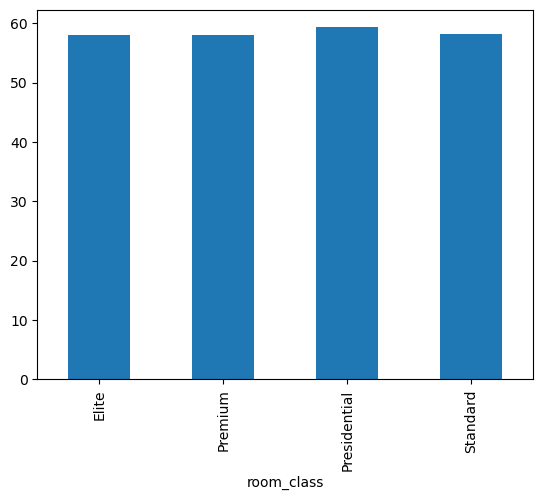

In [64]:
avg_occ_cat.plot(kind='bar')

### **2. What is the average occupancy per city?**

In [65]:
# First we need to merge the df_factagg and df_hotels tables
# Then we need to perform citywise grouping
# Lastly we can calculate the avg occupancy per city

In [66]:
df_factagg=pd.merge(df_factagg,df_hotels,on='property_id')
df_factagg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,RT1,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai


<AxesSubplot:xlabel='city'>

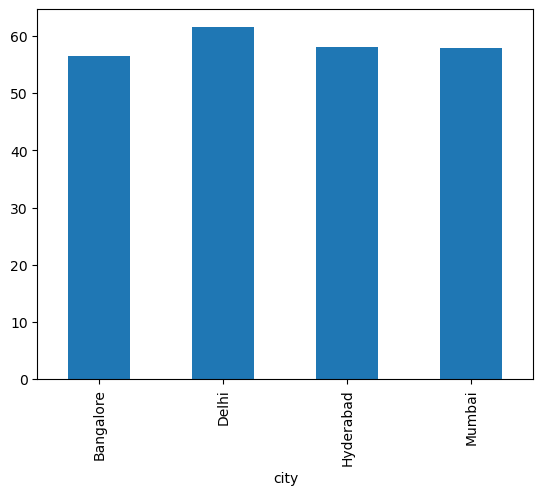

In [67]:
df_factagg.groupby('city')['occ_pct'].mean().plot(kind='bar')

### **3. When was the occupancy better? Weekday/Weekend?**

In [68]:
# First we need to merge the df_factagg and df_date tables
# Then we need to group the data in weekday and weekend
# Then we can calculate the avg occupancy for each category and determine when the
# occuancy was better.

In [69]:
df_factagg=pd.merge(df_factagg,df_date,left_on='check_in_date',right_on='date')
df_factagg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [70]:
df_factagg.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

**Therefore it is evident that the weekend had more occupancy-72.39%, than the week days-50.90%**

<AxesSubplot:xlabel='day_type'>

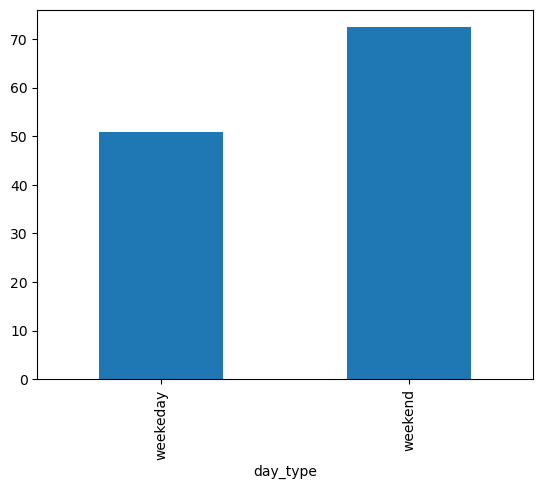

In [71]:
df_factagg.groupby('day_type')['occ_pct'].mean().round(2).plot(kind='bar')

### **4. In the month of June,what is the percentage occupancy of different cities?**

In [72]:
# we need to filter out the data for the month of June
# Then we can calculate the average occupancy in the month of June for cities
# using groupby and mean

In [73]:
df_june=df_factagg[df_factagg['mmm yy']=='Jun 22']
df_june.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [74]:
df_june.groupby('city')['occ_pct'].mean().round(2) 

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city'>

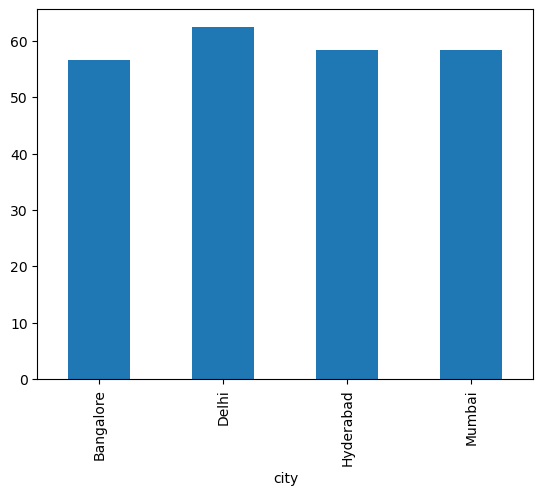

In [75]:
df_june.groupby('city')['occ_pct'].mean().round(2).plot(kind='bar')

### 5. **We need to add the august data in the df_date dataframe from the new_data_august dataframe**

In [76]:
# First we need to read the new_data_august data frame:
df_aug=pd.read_csv('D:/Codebasics/Hproj/new_data_august.csv')
df_aug.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [77]:
# We need to check the shape of both data frames to allow concatenation
print(df_factagg.shape)
print(df_aug.shape)

(6500, 15)
(7, 13)


In [78]:
# Next we need to append the data to teh existing df_date dataframe

df_latest=pd.concat([df_factagg,df_aug],ignore_index=True)
df_latest.tail(15)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6492,17564,31-Jul-22,RT1,8,16.0,50.00,RT1,Standard,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6493,17564,31-Jul-22,RT2,19,40.0,47.50,RT2,Elite,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6494,17564,31-Jul-22,RT3,11,24.0,45.83,RT3,Premium,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,17564,31-Jul-22,RT4,10,17.0,58.82,RT4,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,18560,31-Jul-22,RT1,22,30.0,73.33,RT1,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,18560,31-Jul-22,RT2,34,40.0,85.00,RT2,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,18560,31-Jul-22,RT3,17,24.0,70.83,RT3,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,18560,31-Jul-22,RT4,12,15.0,80.00,RT4,Presidential,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00


### **6. What is the revenue realized per city?**

In [79]:
# We have to access the df_booking dataframe as it containss the revenue data
# We need to merge the df_booking and df_hotels dataframe 
# Once done we can groupby city and detrmine the revenue realized per city

In [80]:
df_booking=pd.read_csv('D:/Codebasics/Hproj/fact_bookings.csv')
df_booking_all=pd.merge(df_booking,df_hotels,on='property_id')
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [81]:
df_booking_all.groupby('city')['revenue_realized'].sum().sort_values()

city
Delhi        294500318
Hyderabad    325232870
Bangalore    420397050
Mumbai       668640991
Name: revenue_realized, dtype: int64

<AxesSubplot:xlabel='city'>

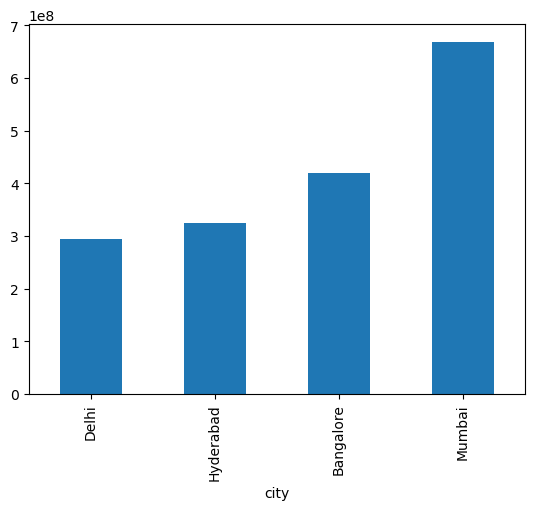

In [82]:
df_booking_all.groupby('city')['revenue_realized'].sum().sort_values().plot(kind='bar')

### **7. What is the month by month revenue?**

In [83]:
# We need to merge the df_date dataframe with the df_booking dataframe to get month data
# Once we get that we can groupby month values and generate the revenue realized per month

In [84]:
df_date=pd.read_csv('D:/Codebasics/Hproj/dim_date.csv')
df_booking_alld=pd.merge(df_booking_all,df_date,left_on='check_in_date',right_on='date')
df_booking_alld.head() #We don't get anything as the date format in both data frames
                  #are different

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [85]:
df_booking_alld.info() 
df_date.info()
# We get data type of 'check_in_date' and 'date' to be object, we need that in date format

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         0 non-null      object 
 1   property_id        0 non-null      int64  
 2   booking_date       0 non-null      object 
 3   check_in_date      0 non-null      object 
 4   checkout_date      0 non-null      object 
 5   no_guests          0 non-null      float64
 6   room_category      0 non-null      object 
 7   booking_platform   0 non-null      object 
 8   ratings_given      0 non-null      float64
 9   booking_status     0 non-null      object 
 10  revenue_generated  0 non-null      int64  
 11  revenue_realized   0 non-null      int64  
 12  property_name      0 non-null      object 
 13  category           0 non-null      object 
 14  city               0 non-null      object 
 15  date               0 non-null      object 
 16  mmm yy             0 non-null      object 


In [86]:
# Converting from object to datetime format

df_date['date']=pd.to_datetime(df_date['date'])
df_booking_all['check_in_date']=pd.to_datetime(df_booking_all['check_in_date'])

In [87]:
df_date.info()
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134587 non-null  float64       
 6  

In [88]:
df_booking_alld=pd.merge(df_booking_all,df_date,left_on='check_in_date',right_on='date')
df_booking_alld.head() # Contains month wise revenue data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [89]:
df_booking_alld.groupby('mmm yy')['revenue_realized'].sum().sort_values()

mmm yy
Jun 22    377191229
Jul 22    390005772
May 22    408375641
Name: revenue_realized, dtype: int64

<AxesSubplot:xlabel='mmm yy'>

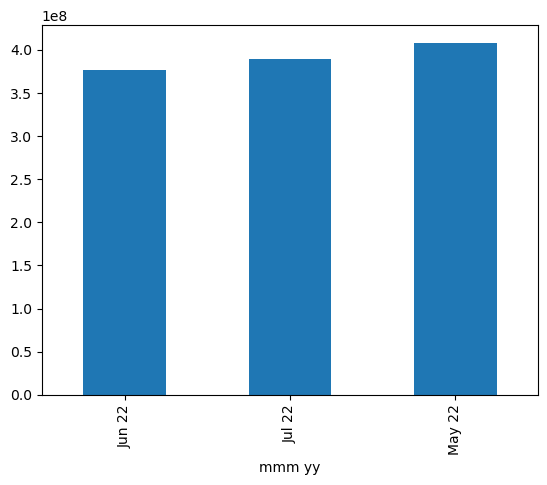

In [90]:
df_booking_alld.groupby('mmm yy')['revenue_realized'].sum().sort_values().plot(kind='bar')

### **8. What is the revenue realized per hotel type?**

##### We can use the df_booking_alld dataframe conatining the room_category and revenue data


In [91]:
df_booking_alld.groupby('room_category')['revenue_realized'].sum().sort_values()

room_category
RT1    212879394
RT4    258905932
RT3    318622920
RT2    385164396
Name: revenue_realized, dtype: int64

In [92]:
# We need to show room classes as texts for better understanding and so we need to
# merge df_booking_alld and df_rooms

In [93]:
df_booking_alld=pd.merge(df_booking_alld,df_rooms,left_on='room_category',right_on='room_id')

In [94]:
df_booking_alld.groupby('room_class')['revenue_realized'].sum().sort_values()

room_class
Standard        212879394
Presidential    258905932
Premium         318622920
Elite           385164396
Name: revenue_realized, dtype: int64

<AxesSubplot:xlabel='room_class'>

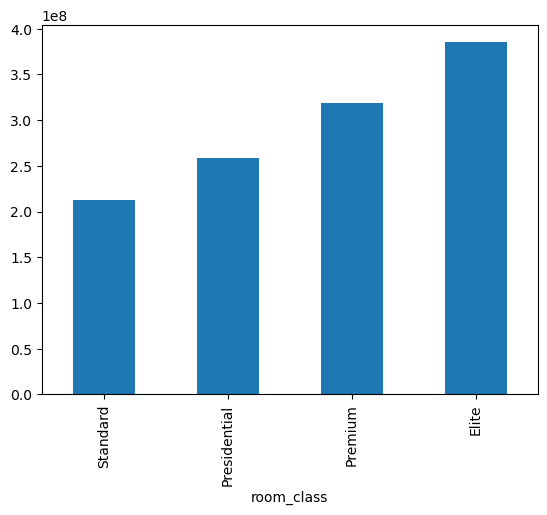

In [95]:
df_booking_alld.groupby('room_class')['revenue_realized'].sum().sort_values().plot(kind='bar')

### **9. What is the average rating per city?**

**We can use the df_booking_alld dataframe, but first we need to clean the dataframe by removing the NaN values then use the groupby and mean functions**

In [96]:
#Cleaning the table data-removing the NaN rating values

df_ratingdata=df_booking_alld[df_booking_alld['ratings_given'].notnull()]
df_ratingdata.head() #We can use this file for further analysis

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type,room_id,room_class
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard
6,May052216558RT17,16558,15-04-22,2022-05-05,6/5/2022,3.0,RT1,others,4.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard


In [97]:
# Grouping the data citywise and calculating avg rating for each city

df_ratingdata.groupby('city')['ratings_given'].mean().sort_values()

city
Bangalore    3.403911
Mumbai       3.644219
Hyderabad    3.664286
Delhi        3.774979
Name: ratings_given, dtype: float64

<AxesSubplot:xlabel='city'>

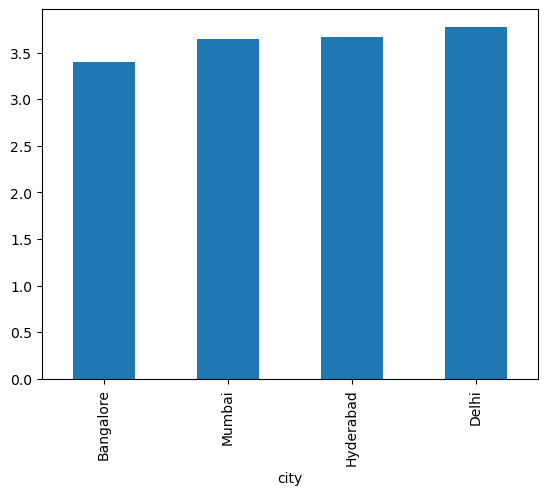

In [98]:
df_ratingdata.groupby('city')['ratings_given'].mean().sort_values().plot(kind='bar')

**Delhi has the highest rating, while bangalore has the lowest**

### **10. Represent the revenue realized per booking platform**

**We can use the df_booking_alld dataframe and calculate the revenue per booking platform**

<AxesSubplot:ylabel='revenue_realized'>

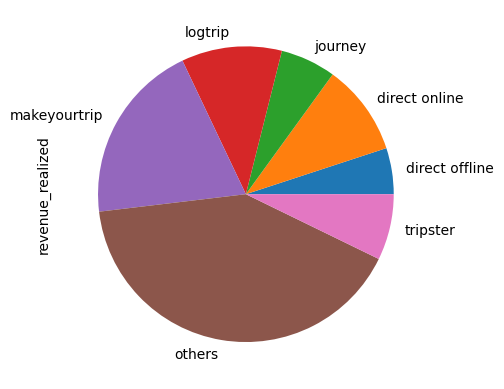

In [99]:
# Grouping the data by booking platforms and using the plot type to pie

df_booking_alld.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')